In [9]:
import sys
paths = sys.path
if paths[1]!='../':
    sys.path=[sys.path[0]] + ['../'] + paths
from eps import EPS
import fmdtools.faultsim.propagate as propagate
import fmdtools.resultdisp as rd

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

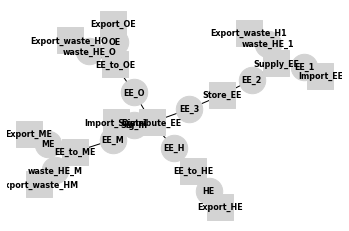

In [10]:
mdl= EPS()
rd.graph.show(mdl.bipartite, gtype='bipartite')

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [11]:
endresults,resgraph, mdlhist = propagate.one_fault(mdl, 'EE_to_ME', 'toohigh_torque')

In this case, however, the output in ``mdlhist`` will be a single-dimensional dictionary (not something we can plot very well)

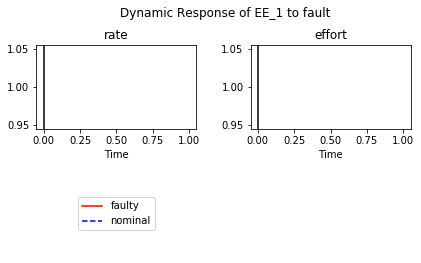

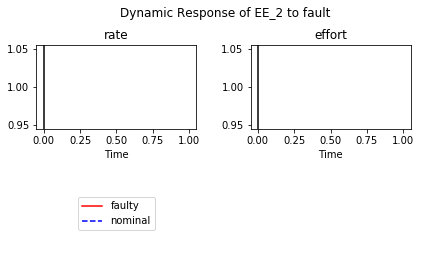

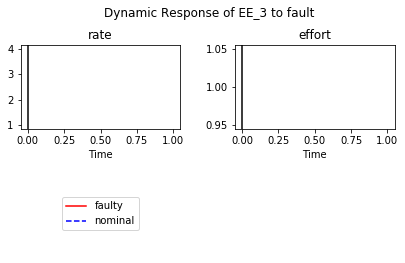

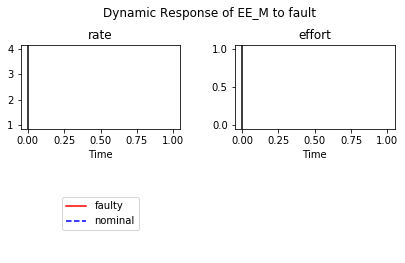

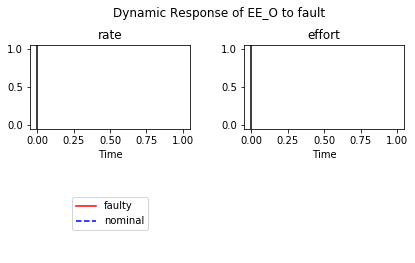

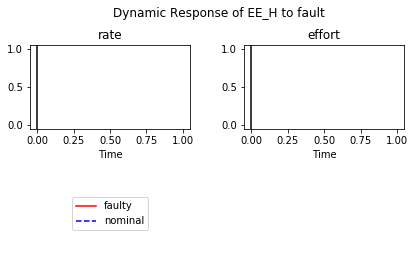

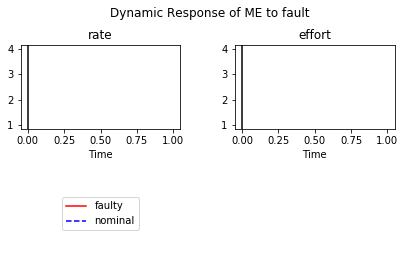

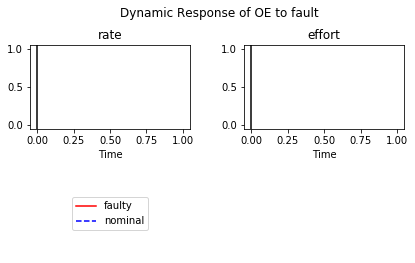

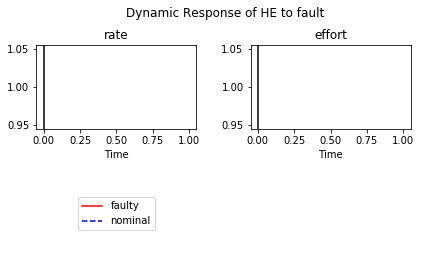

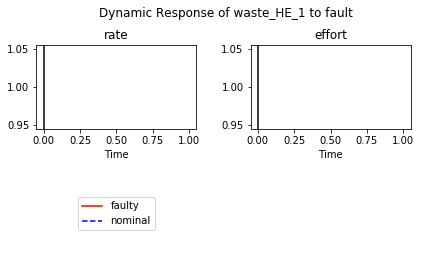

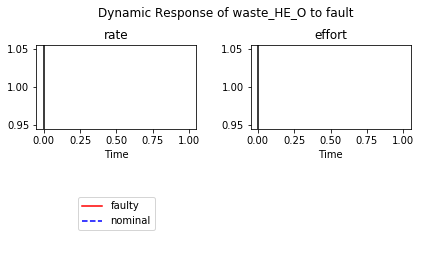

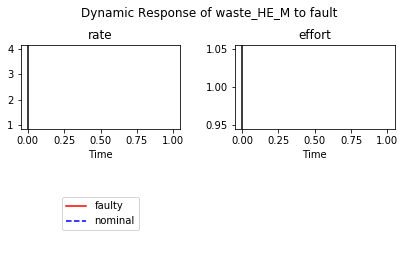

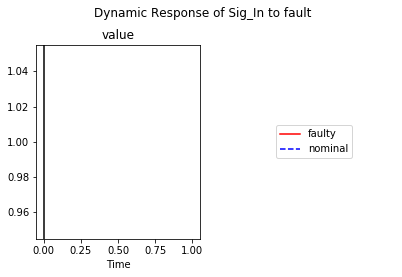

KeyError: 'faults'

In [12]:
rd.plot.mdlhist(mdlhist)

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

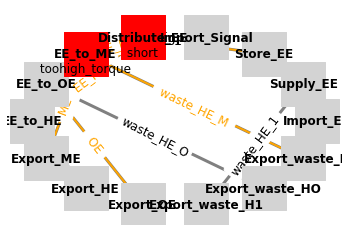

In [13]:
rd.graph.show(resgraph)

We can run the set of single-fault scenarios on this model using ``fmdtools.faultsim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [14]:
endclasses, mdlhists = propagate.single_faults(mdl)

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 509.90it/s]


Using ``make_summarytable``, one can see the degradation effects of this fault on the flows:

In [15]:
reshists, diffs, summary = rd.process.hists(mdlhists)
sumtable = rd.tabulate.summary(summary)
sumtable

,degraded functions,degraded flows
"Import_EE low_v, t=1","[Import_EE, Export_ME, Export_OE]","[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, w..."
"Import_EE high_v, t=1","[Import_EE, Export_ME, Export_OE]","[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, w..."
"Import_EE no_v, t=1","[Import_EE, Export_ME, Export_OE]","[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, w..."
"Supply_EE adverse_resist, t=1","[Supply_EE, Export_ME, Export_OE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, waste_H..."
"Supply_EE minor_overload, t=1","[Supply_EE, Distribute_EE, Export_ME, Export_OE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, waste_H..."
"Supply_EE major_overload, t=1","[Supply_EE, Export_ME, Export_OE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, waste_H..."
"Supply_EE short, t=1","[Supply_EE, Distribute_EE, Export_ME, Export_OE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, waste_H..."
"Supply_EE open_circuit, t=1","[Supply_EE, Export_ME, Export_OE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, waste_H..."
"Store_EE low_storage, t=1","[Store_EE, Export_ME, Export_OE]",[]
"Store_EE no_storage, t=1","[Store_EE, Export_ME, Export_OE]","[EE_3, EE_M, EE_O, EE_H, ME, OE, waste_HE_M]"


Given the value model in find_classification, we can finaly use this to make a simple fmea table:

In [16]:
rd.tabulate.simplefmea(endclasses)

,rate,cost,expected cost
"Import_EE low_v, t=1",1.000000e-05,600.0,262.800
"Import_EE high_v, t=1",5.000000e-06,600.0,131.400
"Import_EE no_v, t=1",1.000000e-05,1200.0,525.600
"Supply_EE adverse_resist, t=1",2.000000e-06,1300.0,113.880
"Supply_EE minor_overload, t=1",1.000000e-05,2800.0,1226.400
"Supply_EE major_overload, t=1",3.000000e-06,900.0,118.260
"Supply_EE short, t=1",1.000000e-07,2800.0,12.264
"Supply_EE open_circuit, t=1",5.000000e-08,1100.0,2.409
"Store_EE low_storage, t=1",5.000000e-06,2000.0,438.000
"Store_EE no_storage, t=1",5.000000e-06,2900.0,635.100
